# Assignment 4
## Data Preprocessing and feature engineering
# Data Preprocessing



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/energy_dataset_.csv'
df = pd.read_csv(file_path)


In [ ]:
df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583


In [ ]:
print(df.isnull().sum())

Type_of_Renewable_Energy         0
Installed_Capacity_MW            0
Energy_Production_MWh            0
Energy_Consumption_MWh           0
Energy_Storage_Capacity_MWh      0
Storage_Efficiency_Percentage    0
Grid_Integration_Level           0
Initial_Investment_USD           0
Funding_Sources                  0
Financial_Incentives_USD         0
GHG_Emission_Reduction_tCO2e     0
Air_Pollution_Reduction_Index    0
Jobs_Created                     0
dtype: int64


In [ ]:
df['missing_count'] = df.isnull().sum(axis=1)

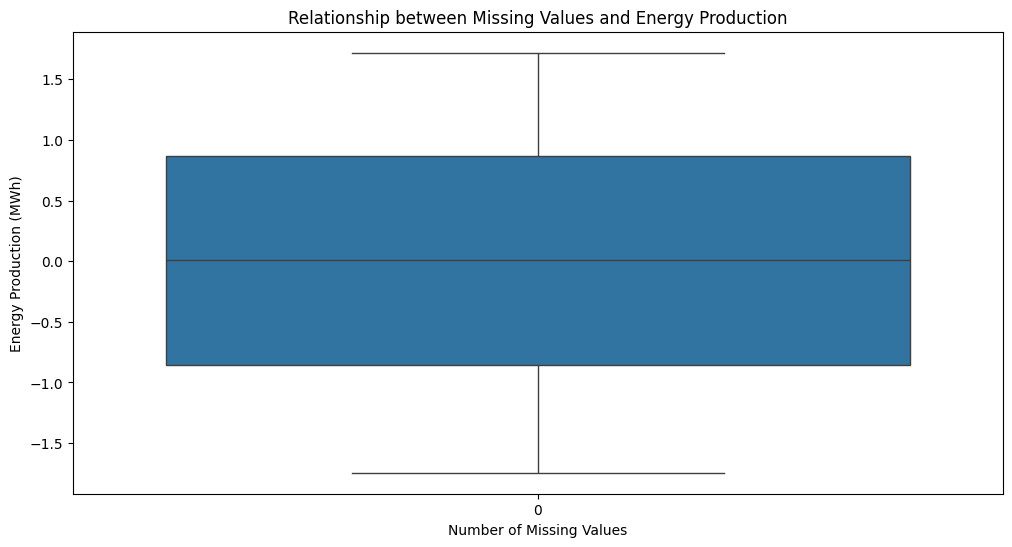

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='missing_count', y='Energy_Production_MWh', data=df)
plt.title('Relationship between Missing Values and Energy Production')
plt.xlabel('Number of Missing Values')
plt.ylabel('Energy Production (MWh)')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 

### Dataset Description
This dataset contains detailed information about various renewable energy systems, including installed capacity, energy production, consumption, storage, investment, and environmental impact. The goal is to provide a comprehensive view of renewable energy, useful for research and analysis in the field of sustainable energy.


Feature engineering and data preprocessing is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning.So We can see some features needs to  undergo processing then we will perform feature engineering after pre-processing


## Convert Categorical Data
Convert categorical features to numerical format if necessary.


In [ ]:
df['Type_of_Renewable_Energy'] = df['Type_of_Renewable_Energy'].astype('category')
df['Funding_Sources'] = df['Funding_Sources'].astype('category')

# Convert categories to numerical codes
df['Type_of_Renewable_Energy'] = df['Type_of_Renewable_Energy'].cat.codes
df['Funding_Sources'] = df['Funding_Sources'].cat.codes


In [ ]:
df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,3,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,0,9.207772e+06,6663.816572,81.742461,1366
1,3,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,1,1.685101e+06,30656.049820,78.139042,1743
2,0,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,1,5.111813e+06,1749.613759,8.461296,363
3,0,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,1,4.805902e+06,43233.237820,8.402441,2821
4,2,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,0,1.668601e+07,14858.662760,28.822867,2583


## Feature Scaling
Scale the features to a similar range, which is especially useful for machine learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify features to scale
features_to_scale = df.columns.difference(['Type_of_Renewable_Energy'])

# Apply scaling
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [ ]:
df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,3,-1.396350,-1.030818,0.175876,-0.717674,1.012663,1.334261,1.547603,-1.228186,-0.142039,-1.291580,1.086241,-0.783280
1,3,0.328286,-0.431270,-0.463380,0.095016,0.634044,1.334261,-0.589165,-0.004893,-1.441940,0.377046,0.960051,-0.523489
2,0,0.451402,0.094910,1.533306,-0.832759,-1.016312,-0.446257,-1.164499,-0.004893,-0.849812,-1.633356,-1.480019,-1.474450
3,0,0.985912,1.629124,0.637334,-1.072891,0.806260,0.444002,1.013991,-0.004893,-0.902672,1.251771,-1.482081,0.219363
4,2,-0.880451,1.599800,1.040524,-0.373618,-0.294790,-0.446257,-1.505734,-1.228186,1.150185,-0.721640,-0.766970,0.055357


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int8   
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  float64
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  float64
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 

## Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for scaling
numerical_cols = [
    'Installed_Capacity_MW', 'Energy_Production_MWh', 'Energy_Consumption_MWh',
    'Energy_Storage_Capacity_MWh', 'Storage_Efficiency_Percentage', 'Initial_Investment_USD',
    'Financial_Incentives_USD', 'GHG_Emission_Reduction_tCO2e', 'Air_Pollution_Reduction_Index',
    'Jobs_Created', 'Energy_Production_Per_Capacity', 'Energy_Consumption_Per_Capacity',
    'Net_Energy_Production', 'Storage_Efficiency'
]

# Filter numerical_cols to include only columns that are actually present in df
existing_numerical_cols = [col for col in numerical_cols if col in df.columns]

# Scaling the numerical columns
scaler = StandardScaler()
df[existing_numerical_cols] = scaler.fit_transform(df[existing_numerical_cols])

# Display the transformed dataframe
print(df.head())

   Type_of_Renewable_Energy  Installed_Capacity_MW  Energy_Production_MWh  \
0                         3              -1.396350              -1.030818   
1                         3               0.328286              -0.431270   
2                         0               0.451402               0.094910   
3                         0               0.985912               1.629124   
4                         2              -0.880451               1.599800   

   Energy_Consumption_MWh  Energy_Storage_Capacity_MWh  \
0                0.175876                    -0.717674   
1               -0.463380                     0.095016   
2                1.533306                    -0.832759   
3                0.637334                    -1.072891   
4                1.040524                    -0.373618   

   Storage_Efficiency_Percentage  Grid_Integration_Level  \
0                       1.012663                1.334261   
1                       0.634044                1.334261   
2       

In [ ]:
df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,3,-1.396350,-1.030818,0.175876,-0.717674,1.012663,1.334261,1.547603,-1.228186,-0.142039,-1.291580,1.086241,-0.783280
1,3,0.328286,-0.431270,-0.463380,0.095016,0.634044,1.334261,-0.589165,-0.004893,-1.441940,0.377046,0.960051,-0.523489
2,0,0.451402,0.094910,1.533306,-0.832759,-1.016312,-0.446257,-1.164499,-0.004893,-0.849812,-1.633356,-1.480019,-1.474450
3,0,0.985912,1.629124,0.637334,-1.072891,0.806260,0.444002,1.013991,-0.004893,-0.902672,1.251771,-1.482081,0.219363
4,2,-0.880451,1.599800,1.040524,-0.373618,-0.294790,-0.446257,-1.505734,-1.228186,1.150185,-0.721640,-0.766970,0.055357


### Adding Interaction Features

In [ ]:
# Creating interaction terms between 'Installed_Capacity_MW' and 'Energy_Production_MWh'
df['Installed_Capacity_x_Energy_Production'] = df['Installed_Capacity_MW'] * df['Energy_Production_MWh']
df['Energy_Production_x_Storage_Efficiency'] = df['Energy_Production_MWh'] * df['Storage_Efficiency_Percentage']


In [ ]:
print(df.head())

   Type_of_Renewable_Energy  Installed_Capacity_MW  Energy_Production_MWh  \
0                         3              -1.396350              -1.030818   
1                         3               0.328286              -0.431270   
2                         0               0.451402               0.094910   
3                         0               0.985912               1.629124   
4                         2              -0.880451               1.599800   

   Energy_Consumption_MWh  Energy_Storage_Capacity_MWh  \
0                0.175876                    -0.717674   
1               -0.463380                     0.095016   
2                1.533306                    -0.832759   
3                0.637334                    -1.072891   
4                1.040524                    -0.373618   

   Storage_Efficiency_Percentage  Grid_Integration_Level  \
0                       1.012663                1.334261   
1                       0.634044                1.334261   
2       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Type_of_Renewable_Energy                15000 non-null  int8   
 1   Installed_Capacity_MW                   15000 non-null  float64
 2   Energy_Production_MWh                   15000 non-null  float64
 3   Energy_Consumption_MWh                  15000 non-null  float64
 4   Energy_Storage_Capacity_MWh             15000 non-null  float64
 5   Storage_Efficiency_Percentage           15000 non-null  float64
 6   Grid_Integration_Level                  15000 non-null  float64
 7   Initial_Investment_USD                  15000 non-null  float64
 8   Funding_Sources                         15000 non-null  float64
 9   Financial_Incentives_USD                15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e            15000 non-null  fl

### Feature Selection

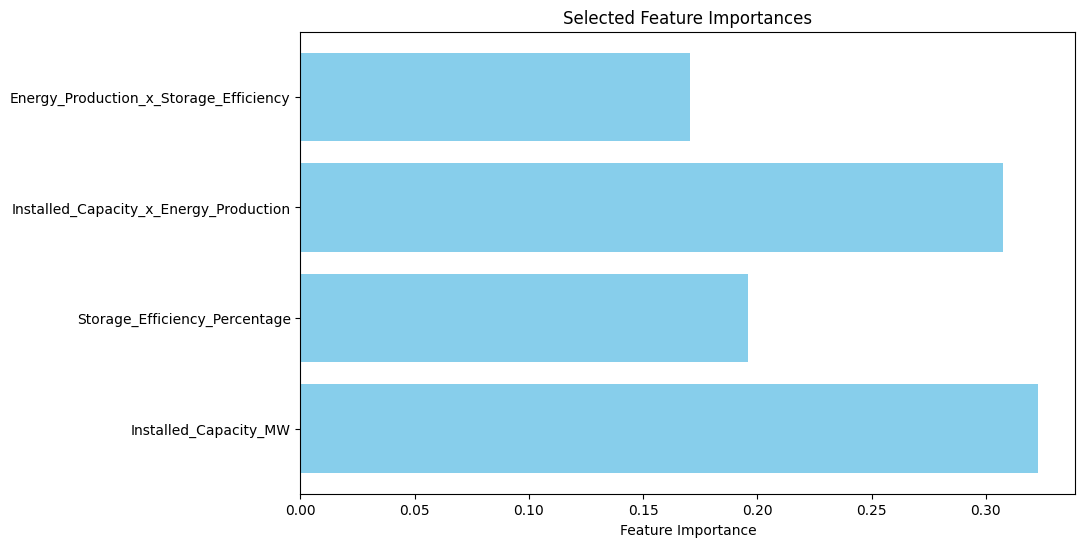

Selected features:
 Index(['Installed_Capacity_MW', 'Storage_Efficiency_Percentage',
       'Installed_Capacity_x_Energy_Production',
       'Energy_Production_x_Storage_Efficiency'],
      dtype='object')
Transformed DataFrame:
    Installed_Capacity_MW  Storage_Efficiency_Percentage  \
0              -1.396350                       1.012663   
1               0.328286                       0.634044   
2               0.451402                      -1.016312   
3               0.985912                       0.806260   
4              -0.880451                      -0.294790   

   Installed_Capacity_x_Energy_Production  \
0                                1.439383   
1                               -0.141580   
2                                0.042842   
3                                1.606173   
4                               -1.408546   

   Energy_Production_x_Storage_Efficiency  
0                               -1.043872  
1                               -0.273444  
2           

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer

# Assume df is the DataFrame already loaded with data

# Set the target variable
target_column = 'Energy_Production_MWh'
y = df[target_column]
X = df.drop(target_column, axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Initialize and fit the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_imputed, y)

# Get feature importances from the fitted model
importances = rf_model.feature_importances_

# Initialize SelectFromModel using the fitted RandomForestRegressor
selector = SelectFromModel(rf_model, prefit=True)

# Get selected features
selected_features = X.columns[selector.get_support()]

# Transform the dataset to keep only selected features
X_selected = selector.transform(X_imputed)
df_selected = pd.DataFrame(X_selected, columns=selected_features)

# Plot feature importances for selected features
plt.figure(figsize=(10, 6))
plt.barh(selected_features, importances[selector.get_support()], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Selected Feature Importances')
plt.show()

# Verify the selected features
print("Selected features:\n", selected_features)
print("Transformed DataFrame:\n", df_selected.head())

# Checking For outliers in every column and removing it if any and representing it using boxplot method

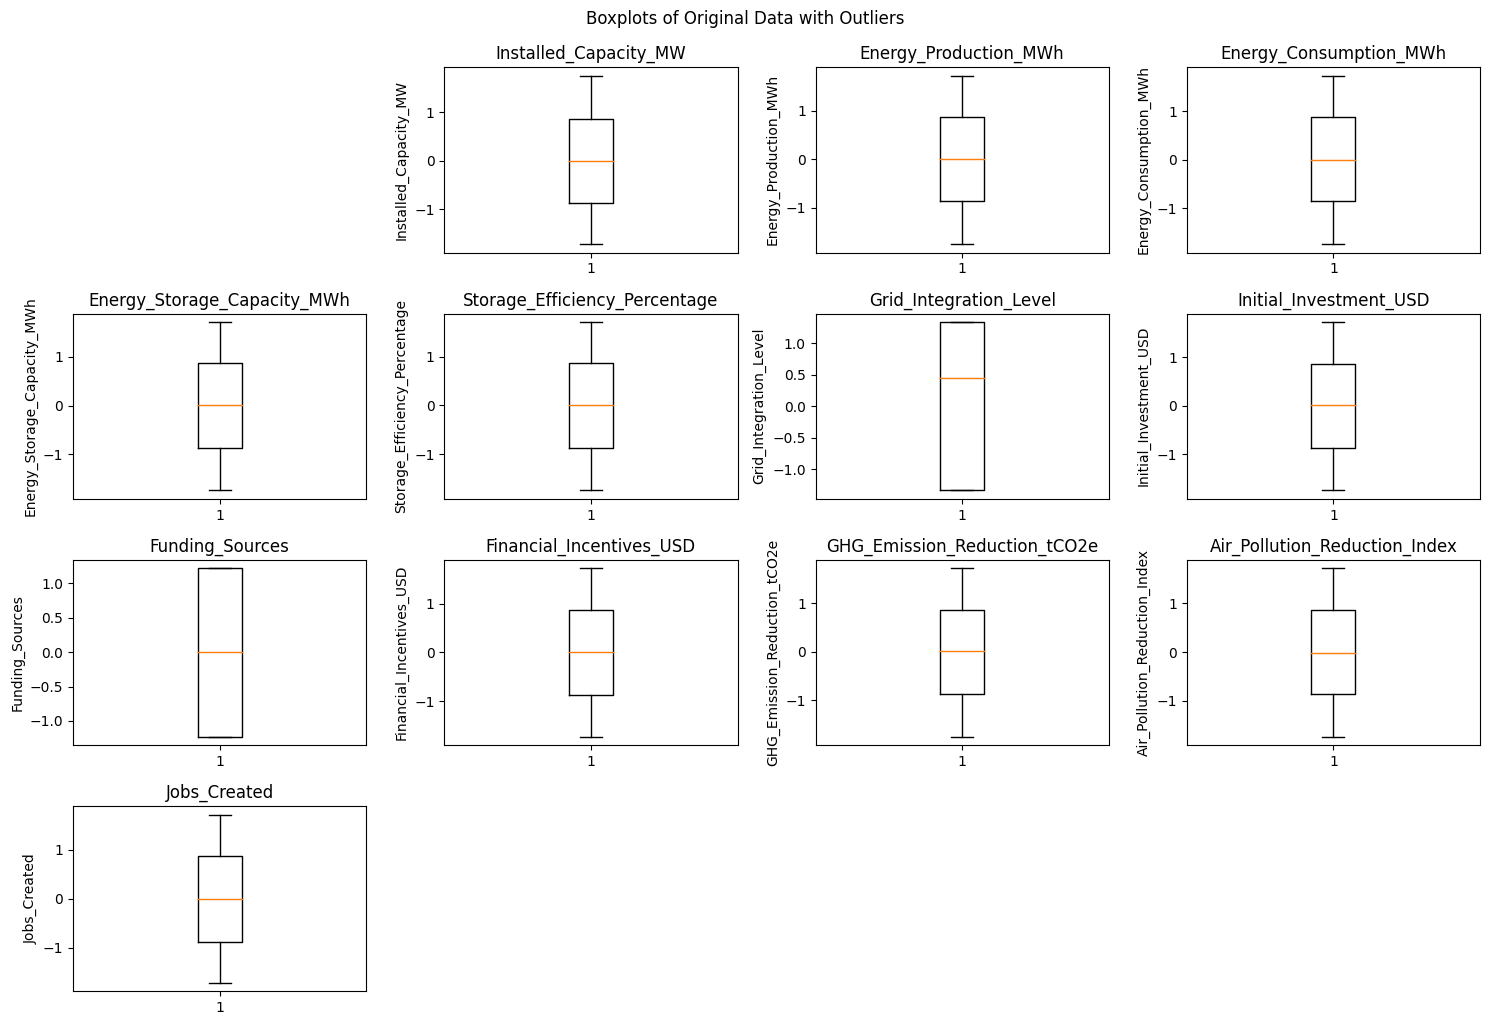

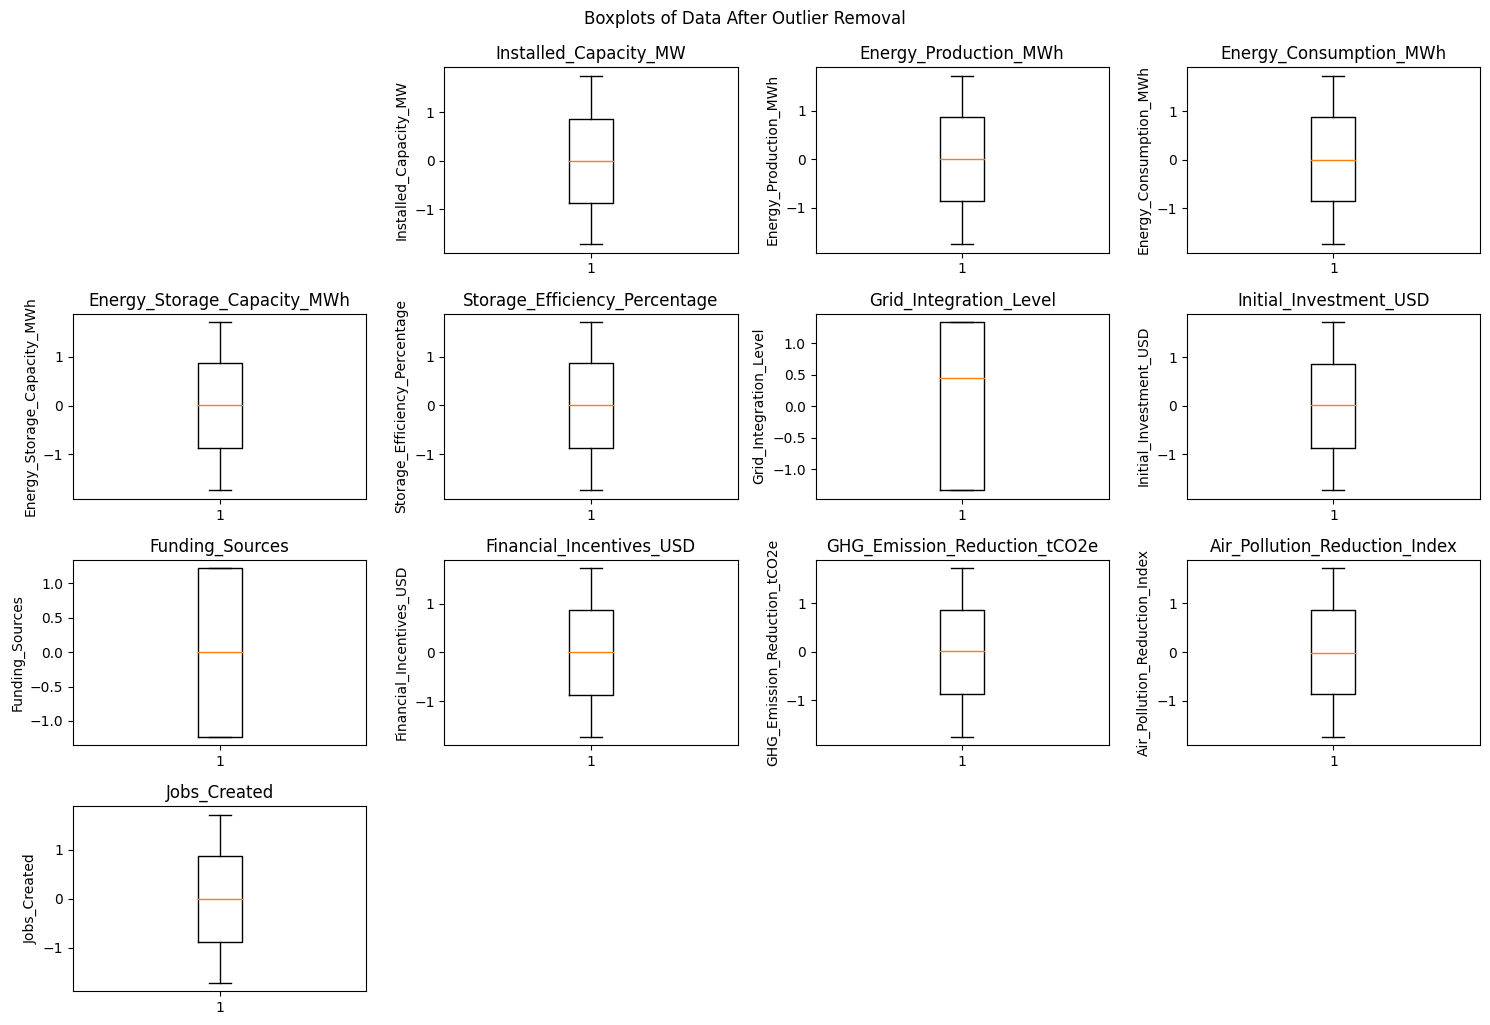

In [ ]:
columns_to_check = [
    'Type_of_Renewable_Energy',
    'Installed_Capacity_MW',
    'Energy_Production_MWh',
    'Energy_Consumption_MWh',
    'Energy_Storage_Capacity_MWh',
    'Storage_Efficiency_Percentage',
    'Grid_Integration_Level',
    'Initial_Investment_USD',
    'Funding_Sources',
    'Financial_Incentives_USD',
    'GHG_Emission_Reduction_tCO2e',
    'Air_Pollution_Reduction_Index',
    'Jobs_Created'
]

# Plotting boxplots for original data with outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check):
    if df[column].dtype in ['float64', 'int64']:
        plt.subplot(4, 4, i+1)
        plt.boxplot(df[column])
        plt.title(column)
        plt.ylabel(column)
plt.tight_layout()
plt.suptitle('Boxplots of Original Data with Outliers', y=1.02)
plt.show()

# Detecting and removing outliers from each column
for column in columns_to_check:
    if df[column].dtype in ['float64', 'int64']:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        outlier_threshold_up = q3 + 1.5 * iqr
        outlier_threshold_down = q1 - 1.5 * iqr
        df = df[(df[column] <= outlier_threshold_up) & (df[column] >= outlier_threshold_down)]

# Plotting boxplots for data after outlier removal
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check):
    if df[column].dtype in ['float64', 'int64']:
        plt.subplot(4, 4, i+1)
        plt.boxplot(df[column])
        plt.title(column)
        plt.ylabel(column)
plt.tight_layout()
plt.suptitle('Boxplots of Data After Outlier Removal', y=1.02)
plt.show()

# Final Results Using Heat map

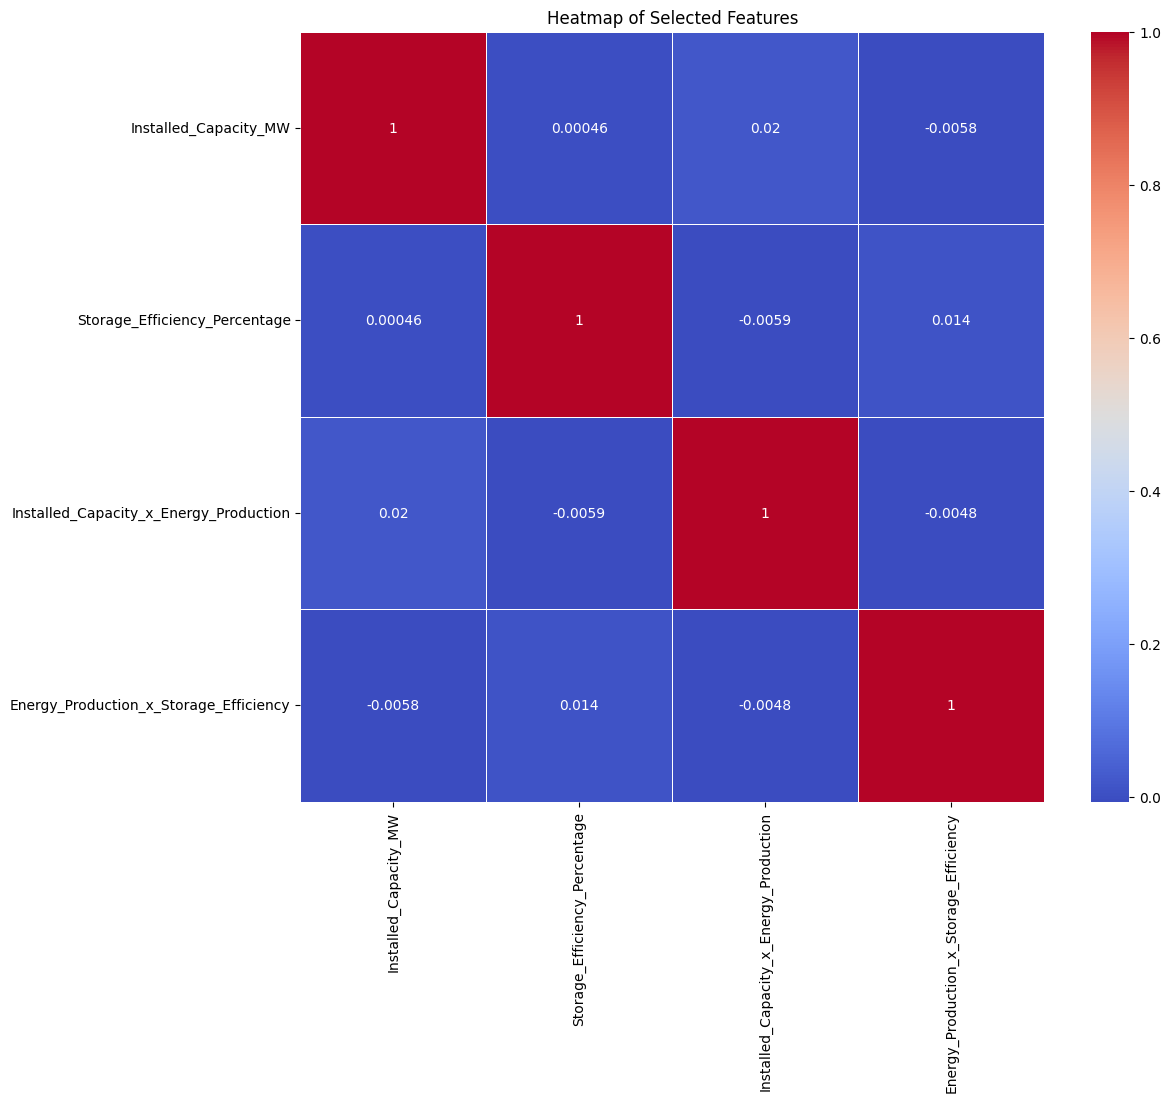

In [ ]:
# Visualize the result using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Selected Features')
plt.show()